In [3]:
# installing the libraries
!pip install ultralytics
!pip install gTTS
!pip install pydub

#importing the libraries
import cv2
import torch
import os
from PIL import Image
from ultralytics import YOLO
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from gtts import gTTS
from IPython.display import Audio, display
from pydub import AudioSegment


#Add your folter path here
folder_path = "/bin/Food_p_Photos"
# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
#model = torch.hub.load("ultralytics/yolov8", "yolov8l")  # Replace "yolov8s" with other versions like "yolov8m" or "yolov8l" if needed
#model = YOLO("yolo11n.pt")

#loading the images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
            img = Image.open(os.path.join(folder, filename))
            images.append(img)
    return images

images = load_images_from_folder(folder_path)
#print('These are the images',images)
#Defining the initial dataframes
df_image = pd.DataFrame()
df_counting=pd.DataFrame()
df_cnt_temp=pd.DataFrame()
#results = model("/bin/Food_p_Photos/fruit3.jpg")  # batch of images
i=0;
print(df_image)
#using YOLO to analyze images
for image in images:
    i=i+1
    results = model(image)
    df_image=results.pandas().xyxy[0]  # im1 predictions (pandas)
    df_image['name_tra'] = df_image['name']
    df_image.loc[df_image['confidence'] <0.1, 'name_tra'] = 'unknown'
    counts = df_image['name_tra'].value_counts()
    df_cnt_temp=pd.DataFrame(counts)
    df_cnt_temp.reset_index(inplace=True)
    df_cnt_temp.columns.values[1] = 'Day '+str(i)
   #df_cnt_temp=df_cnt_temp.transpose()
    if(i>1):
        df_counting = pd.merge(df_counting, df_cnt_temp, on='name_tra', how='outer')
    else:
        df_counting=df_cnt_temp
df_counting.fillna(0, inplace=True)
pd.set_option('display.max_columns', None)
print(df_cnt_temp)

#print(df_counting)
#df_counting[('Day ',i)]=counts[:]

#defining the food and vegetable array
fruit_n_veg=['tomato','cucumber','avocado','carrot','apple','banana','broccoli','orange','bean','corn','lettuce','cabbage','cauliflower','mango','papaya','kiwi','grape','plum','peach','beetroot','raddish','turnip','onion','garlic']

testarr1=[]
testarr2=[]
testarr3=[]

textst='Today we have'
textstnothing='nothing'
print(textst)
#analysis of the shelves
for row in range(len(df_cnt_temp)):
    if df_cnt_temp.iloc[row, 0] in fruit_n_veg:
        testarr1.append(str(df_cnt_temp.iloc[row, 1]))
        testarr1.append(df_cnt_temp.iloc[row, 0])
        print(df_cnt_temp.iloc[row, 1],' ',df_cnt_temp.iloc[row, 0])
    elif(df_cnt_temp.iloc[row, 0]!='unknown'):
        testarr3.append(df_cnt_temp.iloc[row, 0])
if(len(testarr1)==0):
    print('nothing')
textst2='left in the pantry'
print(textst2)

textst3='We are out of'
#if(len(testarr2)>0):
    #print(textst3)

for row in range(len(df_counting)):
    if(df_counting.iloc[row, (len(df_counting.columns)-1)]==0):
        if(df_counting.iloc[row, 0]!='unknown'):
            if df_counting.iloc[row, 0] in fruit_n_veg:
                testarr2.append(df_counting.iloc[row, 0])
                if(len(testarr2)==1):
                    print(textst3)
                print(df_counting.iloc[row, 0])

#Detection of unmatched items
textst4='There is a'
textst5='on the shelf. Please consider removing them.'
if(len(testarr3)>0):
    print(textst4)
    #print(testarr3)
    for j in range(len(testarr3)):
        print(testarr3[j])
    print(textst5)

#filtering the database
df_counting = df_counting[df_counting["name_tra"].isin(fruit_n_veg)]
df_counting = df_counting.reset_index(drop=True)
print(df_counting)

print()

#sound output generation
def generate_audio_segment(text, lang="en"):
    tts = gTTS(text=text, lang=lang)
    tts.save("temp.mp3")
    return AudioSegment.from_file("temp.mp3", format="mp3")

combined_audio = AudioSegment.empty()  # Start with an empty audio segment


segment = generate_audio_segment(textst)
combined_audio += segment
if(len(testarr1)>2):
    for text in testarr1:
        segment = generate_audio_segment(text)
        combined_audio += segment  # Append the audio segment
else:
    segment = generate_audio_segment(textstnothing)
    combined_audio += segment
segment = generate_audio_segment(textst2)
combined_audio += segment

if(len(testarr2)>0):
    segment = generate_audio_segment(textst3)
    combined_audio += segment
    for text in testarr2:
        segment = generate_audio_segment(text)
        combined_audio += segment  # Append the audio segment

if(len(testarr3)>0):
    segment = generate_audio_segment(textst4)
    combined_audio += segment

    for text in testarr3:
        segment = generate_audio_segment(text)
        combined_audio += segment

    segment = generate_audio_segment(textst5)
    combined_audio += segment

# Export the combined audio to a single file
combined_audio.export("combined_audio.mp3", format="mp3")

#Playing the saved audio file
display(Audio("combined_audio.mp3", autoplay=True))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 19.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-1 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 148MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ult

Empty DataFrame
Columns: []
Index: []
  name_tra  Day 1
0    apple      8
1   orange      4
2   banana      1
3     vase      1
4    knife      1
Today we have
8   apple
4   orange
1   banana
left in the pantry
There is a
vase
knife
on the shelf. Please consider removing them.
  name_tra  Day 1
0    apple      8
1   orange      4
2   banana      1



100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]



image 1/1 /bin/Food_p_Photos/fruit12.jpg: 640x512 1 banana, 12 apples, 5 oranges, 184.9ms
Speed: 3.4ms preprocess, 184.9ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 512)


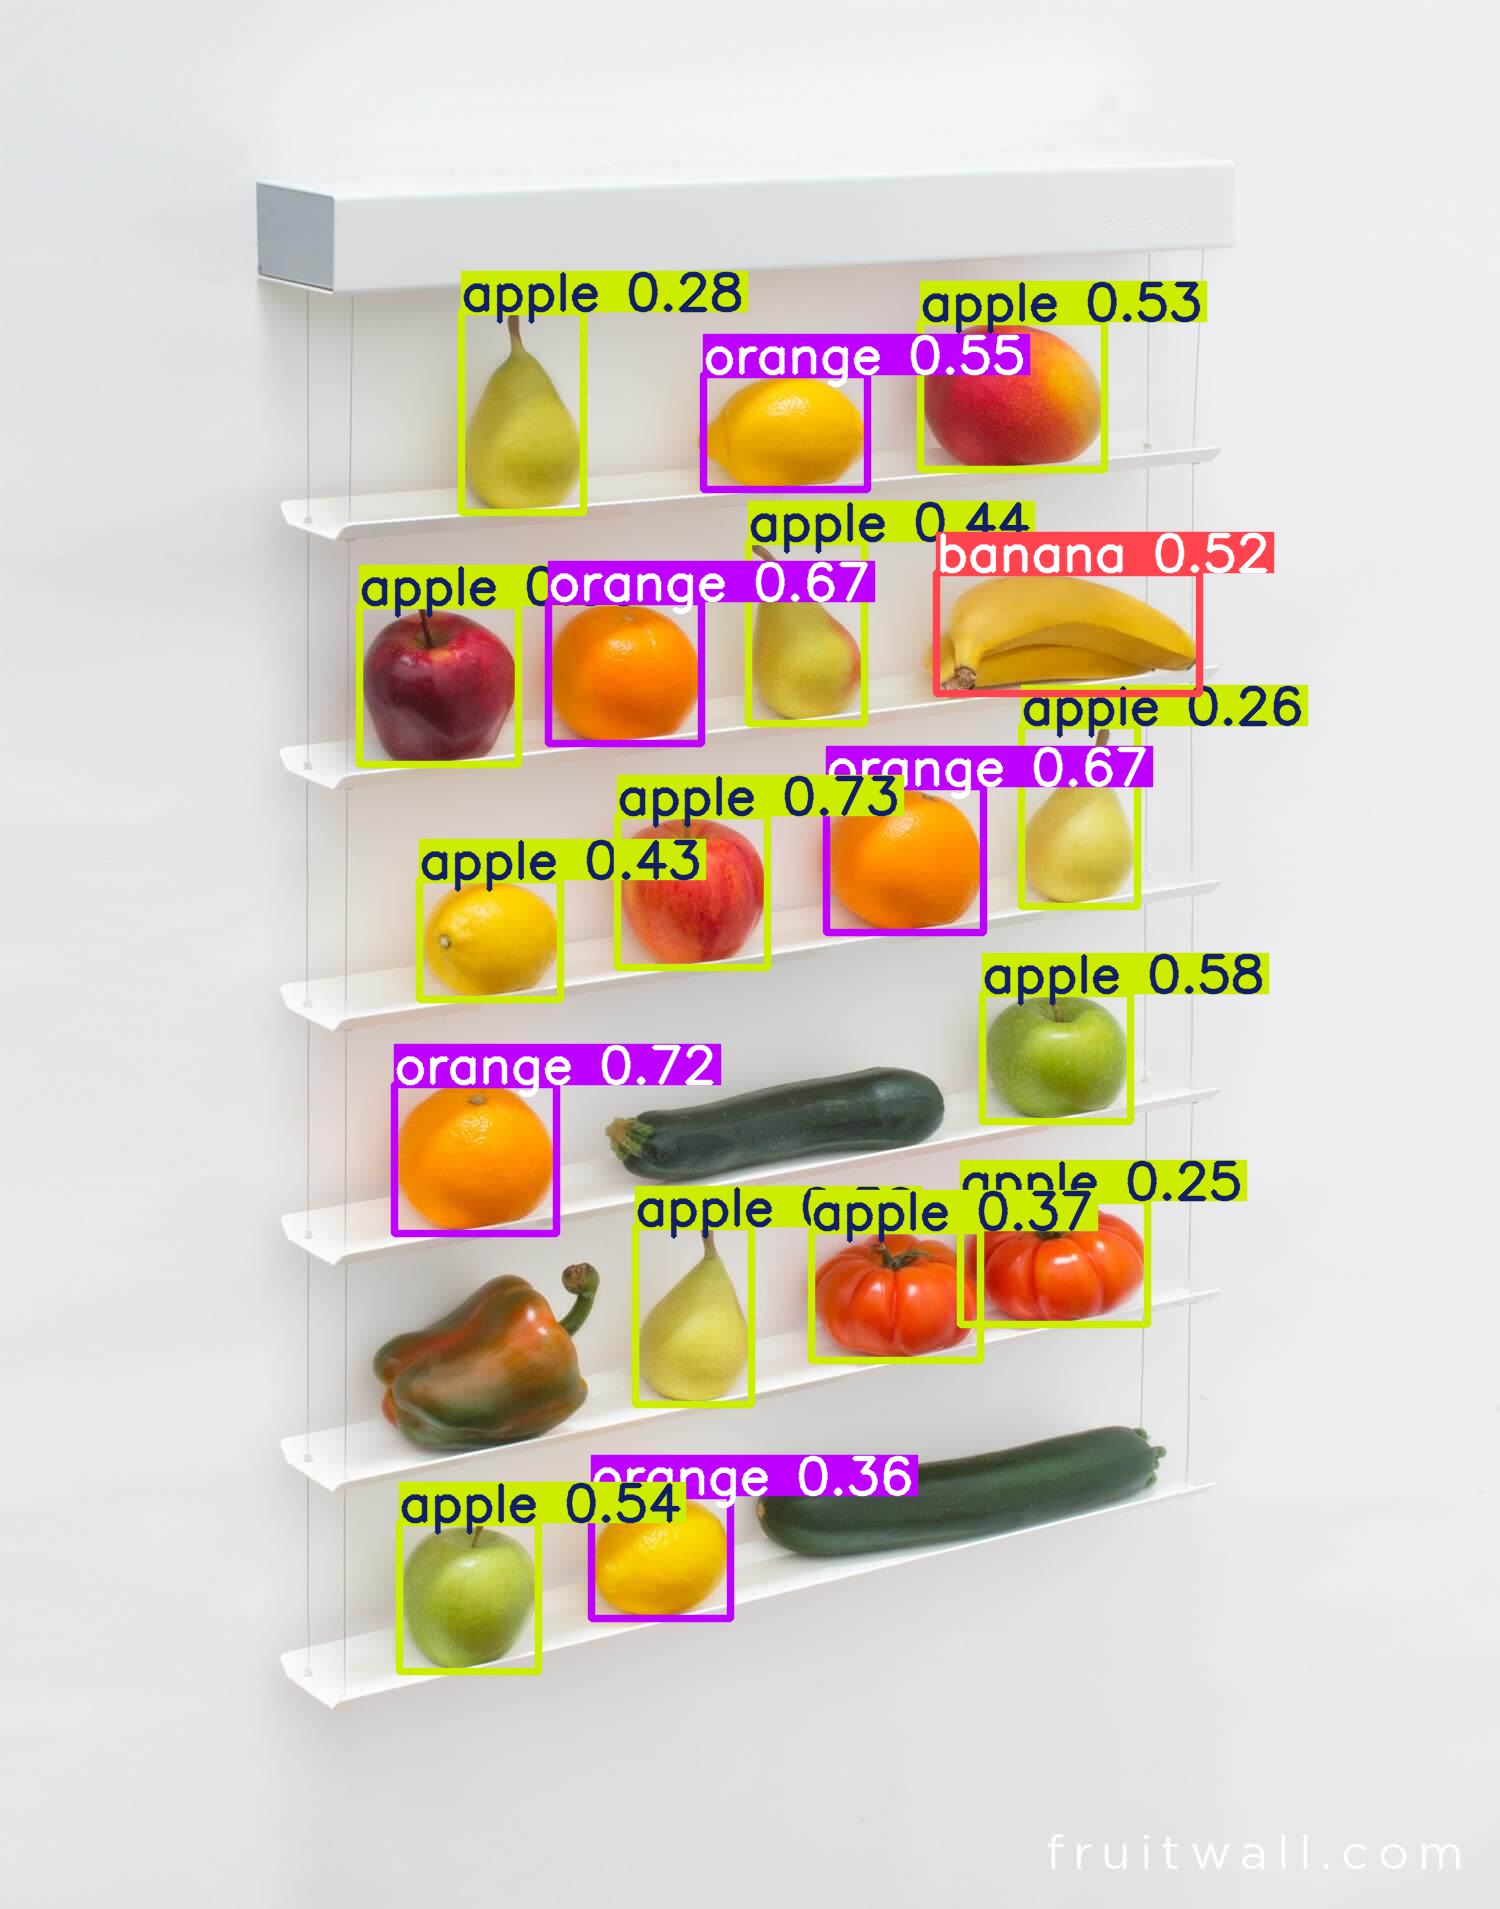

In [4]:
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("/bin/Food_p_Photos/fruit12.jpg")

# Visualize the results
#print(results.xyxy[0])
for result in results:
    result.show()